In [ ]:
#Linear regression by using Deep Neural network: Implement Boston housing price prediction problem by Linear regression using Deep Neura network. Use Boston House price prediction dataset

In [1]:
# Import libraries for data manipulation
import pandas as pd

import numpy as np

# Import libraries for data visualization
import matplotlib.pyplot as plt

import seaborn as sns

from statsmodels.graphics.gofplots import ProbPlot

# Import libraries for building linear regression model
from statsmodels.formula.api import ols

import statsmodels.api as sm

from sklearn.linear_model import LinearRegression

# Import library for preparing data
from sklearn.model_selection import train_test_split

# Import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"C:\Users\rites\Downloads\DL\Boston.csv")

df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,506.0,253.500000,146.213884,1.00000,127.250000,253.50000,379.750000,506.0000
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000


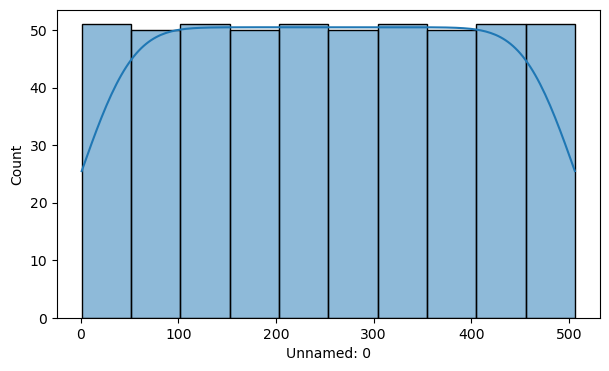

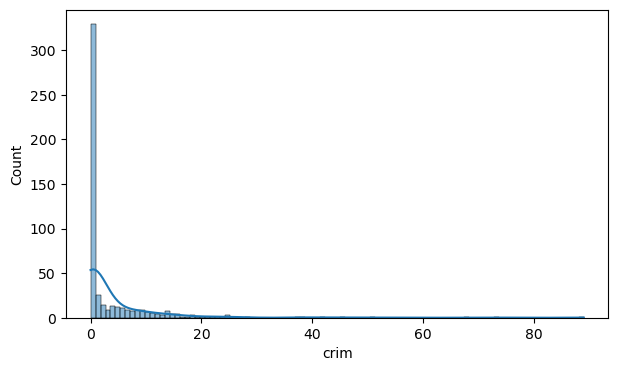

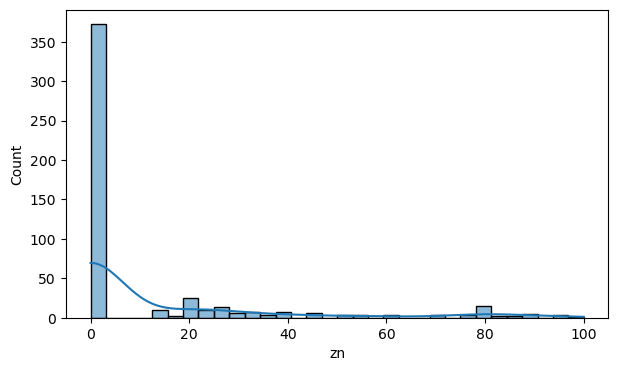

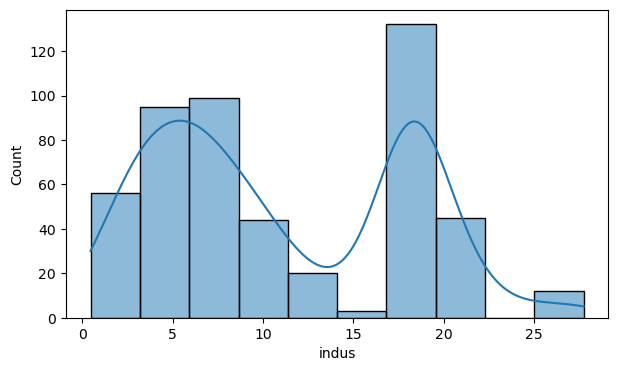

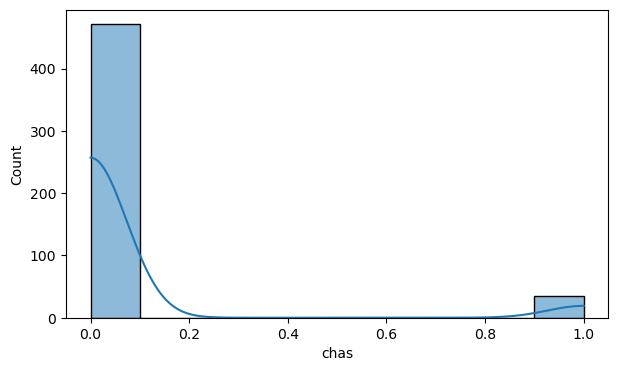

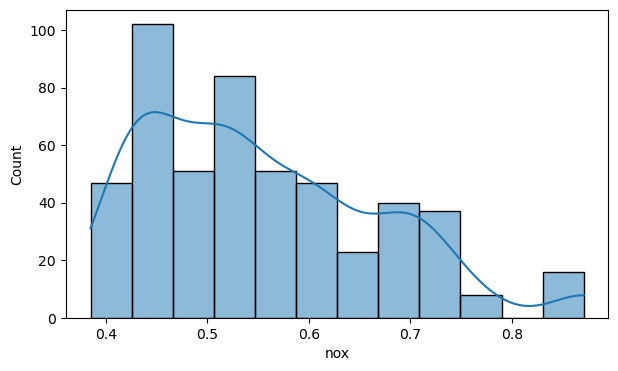

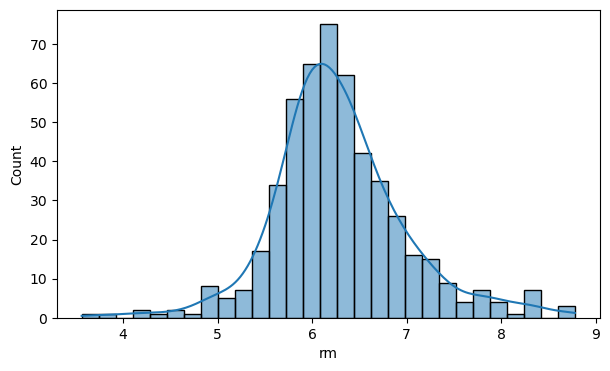

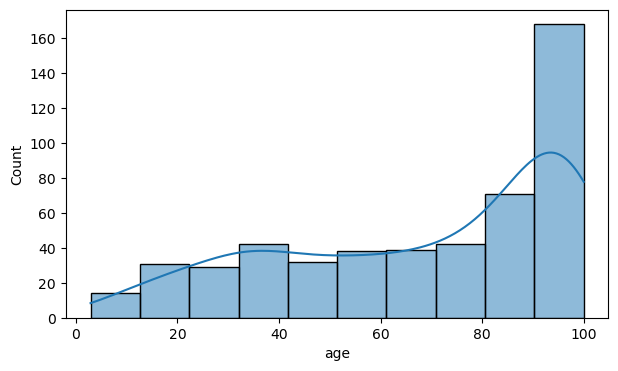

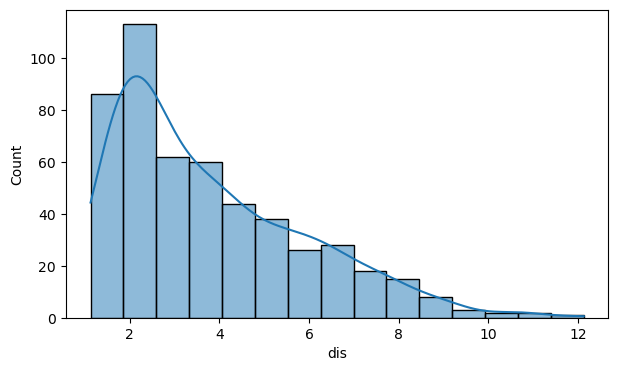

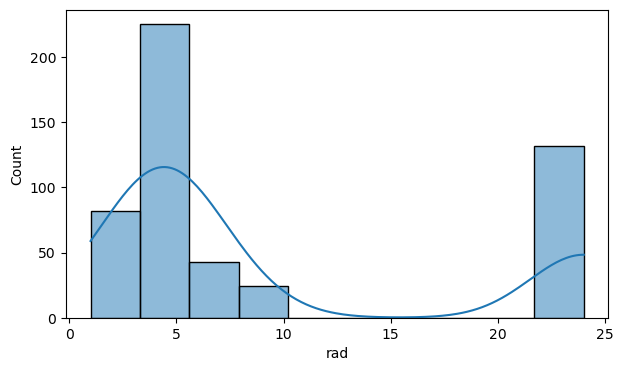

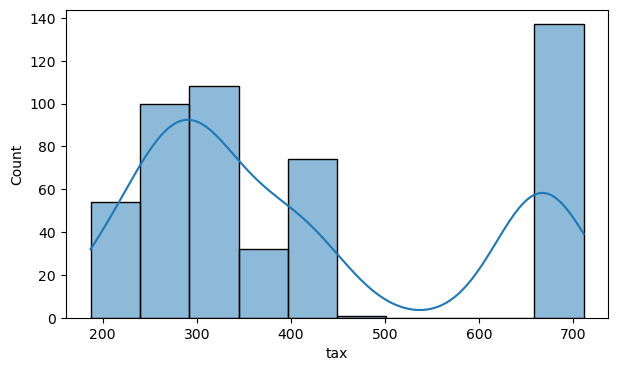

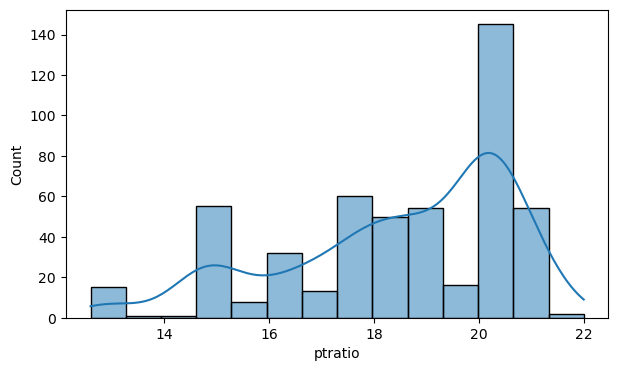

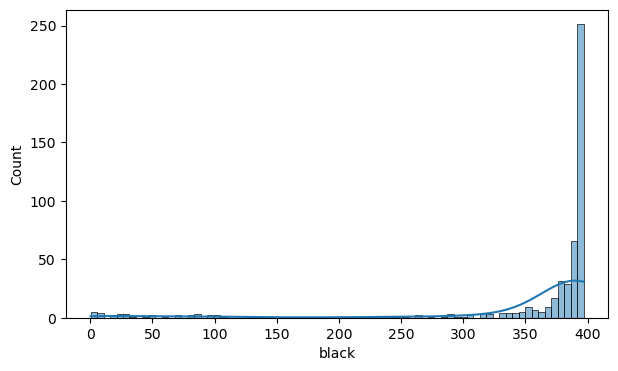

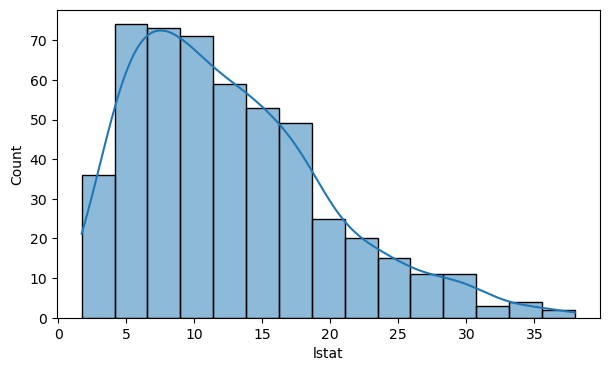

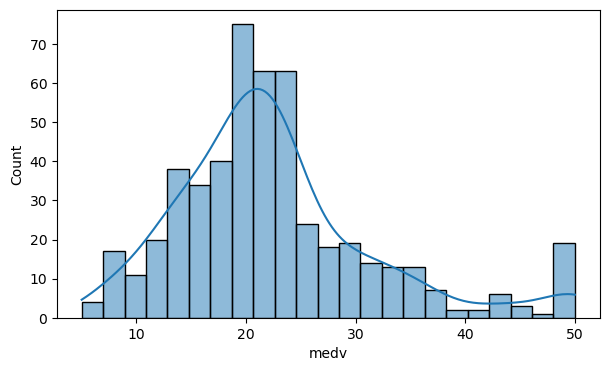

In [8]:
# Plotting all the columns to look at their distributions
for i in df.columns:

    plt.figure(figsize = (7, 4))

    sns.histplot(data = df, x = i, kde = True)

    plt.show()

In [10]:
df['MEDV_log'] = np.log(df['medv'])

<Axes: xlabel='MEDV_log', ylabel='Count'>

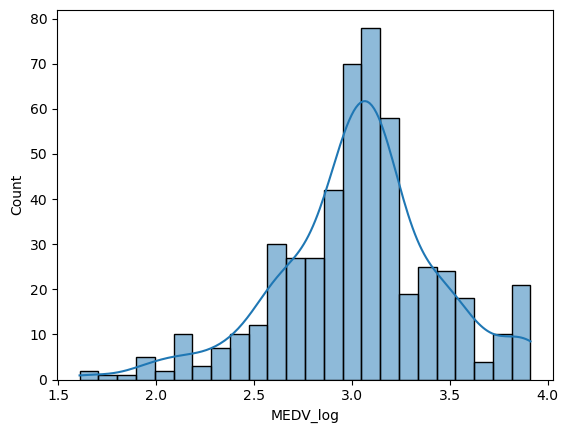

In [11]:
sns.histplot(data = df, x = 'MEDV_log', kde = True)

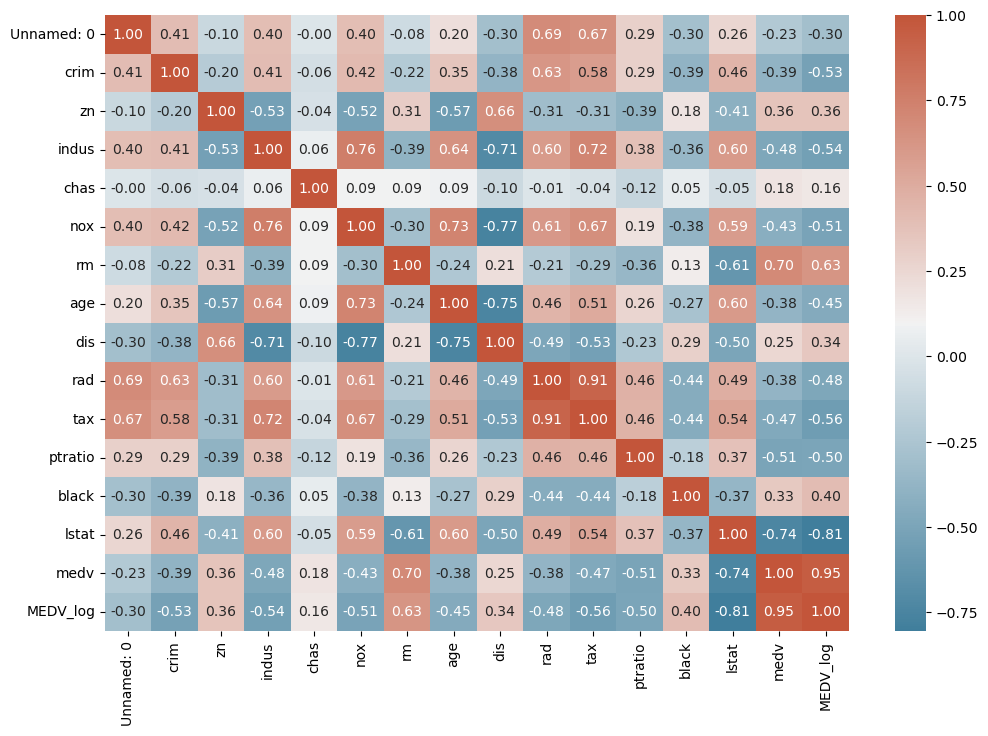

In [12]:
#Bivariate Analysis
#Check the correlation using heatmap
plt.figure(figsize = (12, 8))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = cmap)

plt.show()

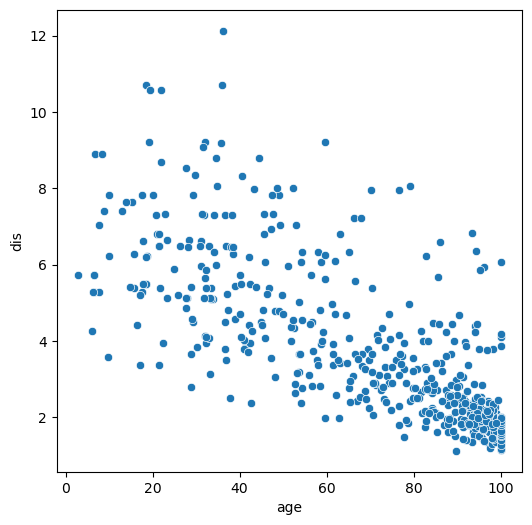

In [15]:
# Scatterplot to visualize the relationship between AGE and DIS
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'age', y = 'dis', data = df)

plt.show()

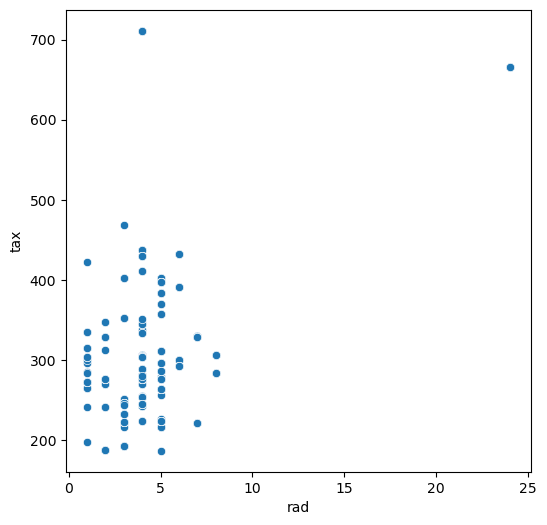

In [16]:
# Scatterplot to visulaize the relationship between RAD and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'rad', y = 'tax', data = df)

plt.show()

In [19]:
# Remove the data corresponding to high tax rate
df1 = df[df['tax'] < 600]

# Import the required function
from scipy.stats import pearsonr

# Calculate the correlation
print('The correlation between TAX and RAD is', pearsonr(df1['tax'], df1['rad'])[0])

The correlation between TAX and RAD is 0.24975731331429196


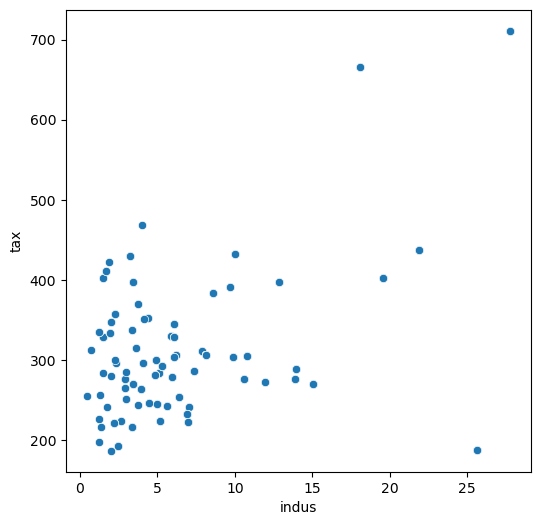

In [20]:
# Scatterplot to visualize the relationship between INDUS and TAX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'indus', y = 'tax', data = df)

plt.show()

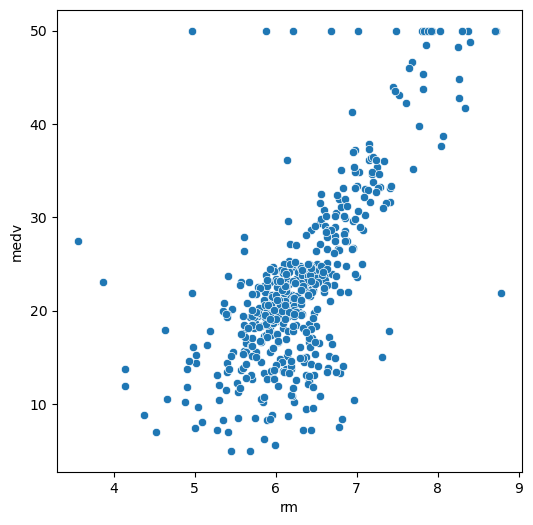

In [21]:
# Scatterplot to visulaize the relationship between RM and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'rm', y = 'medv', data = df)

plt.show()

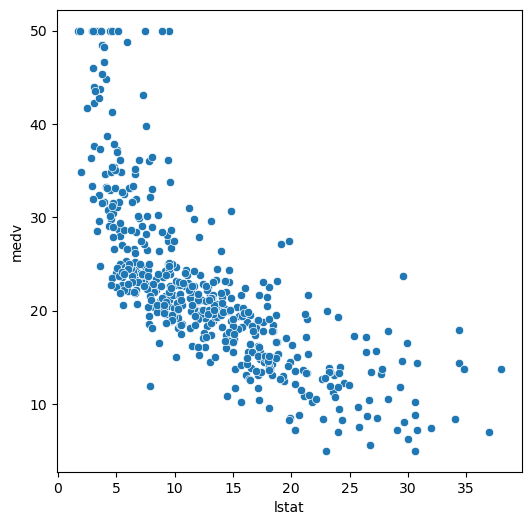

In [22]:
# Scatterplot to visulaize the relationship between LSTAT and MEDV
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'lstat', y = 'medv', data = df)

plt.show()

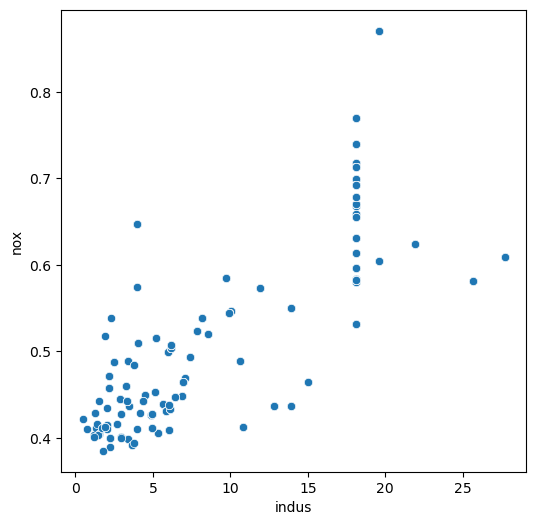

In [23]:
# Scatterplot to visualize the relationship between INDUS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'indus', y = 'nox', data = df)

plt.show()

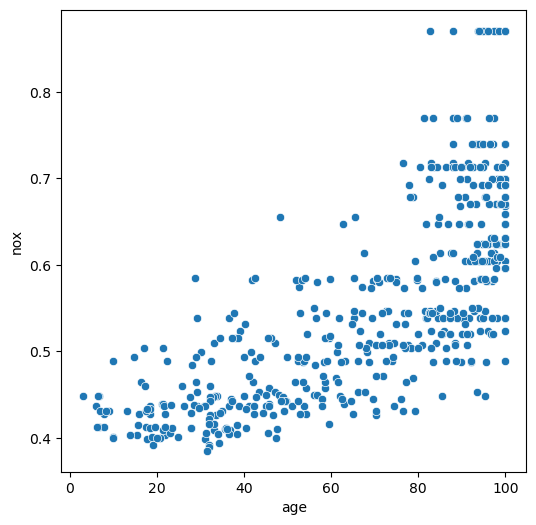

In [24]:
# Scatterplot to visualize the relationship between AGE and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'age', y = 'nox', data = df)

plt.show()

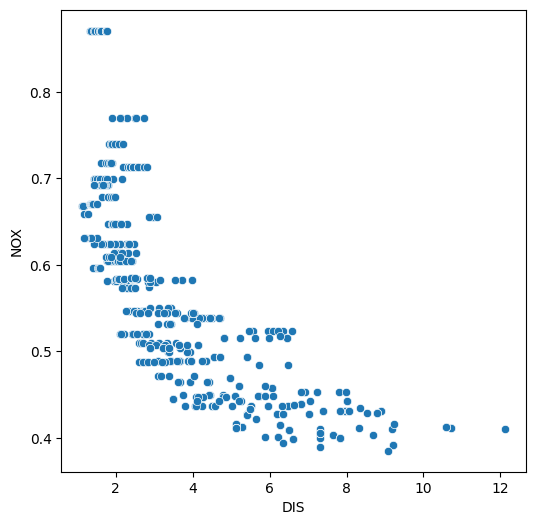

In [17]:
# Scatterplot to visualize the relationship between DIS and NOX
plt.figure(figsize = (6, 6))

sns.scatterplot(x = 'DIS', y = 'NOX', data = df)

plt.show()

In [25]:
# Split the dataset\  Separate the dependent variable and indepedent variables
Y = df['MEDV_log']

X = df.drop(columns = {'medv', 'MEDV_log'})

# Add the intercept term
X = sm.add_constant(X)

In [26]:
# splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30, random_state = 1)

In [27]:
#Check for Mlticollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Function to check VIF
def checking_vif(train):
    vif = pd.DataFrame()
    vif["feature"] = train.columns

    # Calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(train.values, i) for i in range(len(train.columns))
    ]
    return vif


print(checking_vif(X_train))

       feature         VIF
0        const  587.216817
1   Unnamed: 0    2.282913
2         crim    1.993781
3           zn    2.795249
4        indus    4.013317
5         chas    1.080706
6          nox    4.431217
7           rm    1.880090
8          age    3.230000
9          dis    4.387807
10         rad    9.258168
11         tax   10.259227
12     ptratio    1.948590
13       black    1.385250
14       lstat    2.929747


In [29]:
# Create the model after dropping TAX
X_train = X_train.drop(columns = 'tax')

# Check for VIF
print(checking_vif(X_train))

       feature         VIF
0        const  583.945977
1   Unnamed: 0    2.268409
2         crim    1.992686
3           zn    2.554560
4        indus    3.303941
5         chas    1.054008
6          nox    4.398848
7           rm    1.876635
8          age    3.226771
9          dis    4.369546
10         rad    4.243708
11     ptratio    1.914600
12       black    1.384982
13       lstat    2.928201


In [30]:
# Model Building
#Linear Regression Model1
#Create the model using ordinary least squared
model1 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                     88.70
Date:                Sun, 28 Apr 2024   Prob (F-statistic):          9.86e-101
Time:                        23:41:43   Log-Likelihood:                 79.422
No. Observations:                 354   AIC:                            -130.8
Df Residuals:                     340   BIC:                            -76.67
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.5251      0.253     17.859      0.000       4.027       5.023
Unnamed: 0    -0.0002      0.000     -1.495      0.136      -0.000    5.11e-05
crim          -0.0122      0.002     -7.039      0.000      -0.016      -0.009
zn             0.0012      0.001      1.649      0.100      -0.000       0.003
indus          0.0002      0.003      0.067      0.947      -0.005       0.006
chas           0.1184      0.039      3.062      0.002       0.042       0.194
nox           -1.0243      0.187     -5.490      0.000      -1.391      -0.657
rm             0.0573      0.021      2.760      0.006       0.016       0.098
age            0.0001      0.001      0.162      0.872      -0.001       0.001
dis           -0.0509      0.010     -4.957      0.000      -0.071      -0.031
rad            0.0100      0.002      4.077      0.000       0.005       0.015
ptratio       -0.0458      0.007     -6.764      0.000      -0.059      -0.032
black          0.0002      0.000      1.789      0.074   -2.43e-05       0.001
lstat         -0.0292      0.002    -11.839      0.000      -0.034      -0.024
==============================================================================
Omnibus:                       32.561   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.795
Skew:                           0.403   Prob(JB):                     5.23e-20
Kurtosis:                       5.317   Cond. No.                     1.22e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
#Linear Regression Model2
# Create the model after dropping columns 'MEDV', 'MEDV_log', 'TAX', 'ZN', 'AGE', 'INDUS' from df DataFrame
Y = df['MEDV_log']

X = df.drop(['zn','age','indus'], axis=1)

X = sm.add_constant(X)

# Splitting the data in 70:30 ratio of train to test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.30 , random_state = 1)

# Create the model
model2 = sm.OLS(y_train,X_train).fit()

# Get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               MEDV_log   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.272e+30
Date:                Sun, 28 Apr 2024   Prob (F-statistic):               0.00
Time:                        23:41:58   Log-Likelihood:                 11509.
No. Observations:                 354   AIC:                        -2.299e+04
Df Residuals:                     340   BIC:                        -2.294e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.61e-15   4.27e-15     -0.377      0.706      -1e-14    6.79e-15
Unnamed: 0  1.312e-17   1.01e-18     12.976      0.000    1.11e-17    1.51e-17
crim       -4.163e-17   1.96e-17     -2.127      0.034   -8.01e-17   -3.14e-18
chas       -1.166e-15   3.75e-16     -3.108      0.002    -1.9e-15   -4.28e-16
nox         6.106e-16   1.71e-15      0.356      0.722   -2.76e-15    3.98e-15
rm         -2.776e-17   2.08e-16     -0.133      0.894   -4.37e-16    3.81e-16
dis        -1.527e-16   7.87e-17     -1.940      0.053   -3.07e-16    2.13e-18
rad        -9.021e-17   3.35e-17     -2.695      0.007   -1.56e-16   -2.44e-17
tax        -3.686e-18   1.66e-18     -2.227      0.027   -6.94e-18    -4.3e-19
ptratio      2.22e-16   6.44e-17      3.449      0.001    9.54e-17    3.49e-16
black      -7.156e-18    1.3e-18     -5.487      0.000   -9.72e-18   -4.59e-18
lstat      -3.469e-17   2.67e-17     -1.300      0.194   -8.72e-17    1.78e-17
medv        6.939e-17   4.58e-17      1.514      0.131   -2.07e-17     1.6e-16
MEDV_log       1.0000   1.17e-15   8.56e+14      0.000       1.000       1.000
==============================================================================
Omnibus:                        1.929   Durbin-Watson:                   1.558
Prob(Omnibus):                  0.381   Jarque-Bera (JB):                1.861
Skew:                          -0.178   Prob(JB):                        0.394
Kurtosis:                       2.990   Cond. No.                     2.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [32]:
residuals = model2.resid

np.mean(residuals)

-9.113864716273177e-16

In [33]:
from statsmodels.stats.diagnostic import het_white

from statsmodels.compat import lzip

import statsmodels.stats.api as sms

In [34]:
name = ["F statistic", "p-value"]

test = sms.het_goldfeldquandt(y_train, X_train)

lzip(name, test)

[('F statistic', 0.027019094098578382), ('p-value', 0.9999999999999999)]

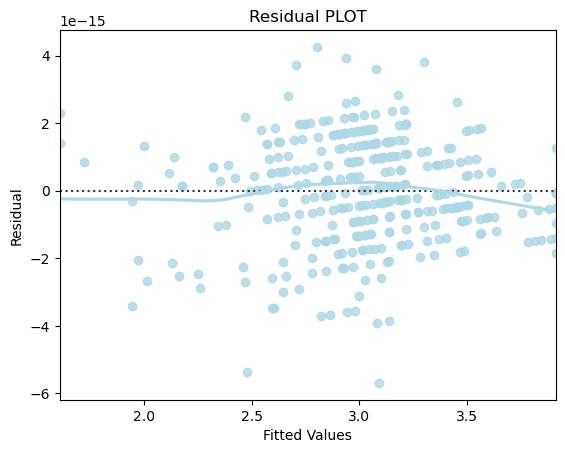

In [35]:
# Predicted values
fitted = model2.fittedvalues

# sns.set_style("whitegrid")
sns.residplot(x = fitted, y = residuals, color = "lightblue", lowess = True)

plt.xlabel("Fitted Values")

plt.ylabel("Residual")

plt.title("Residual PLOT")

plt.show()

<Axes: ylabel='Count'>

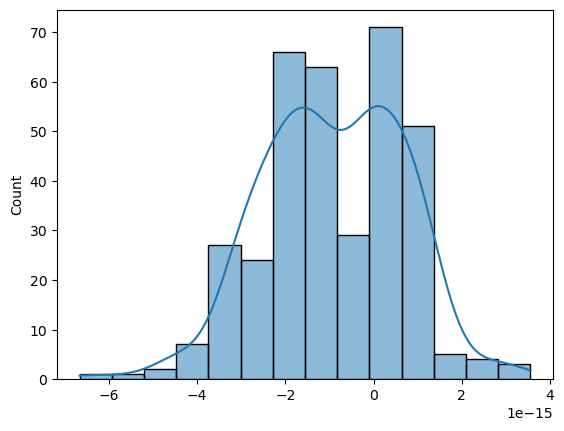

In [36]:
# Plot histogram of residuals

sns.histplot(residuals, kde = True)

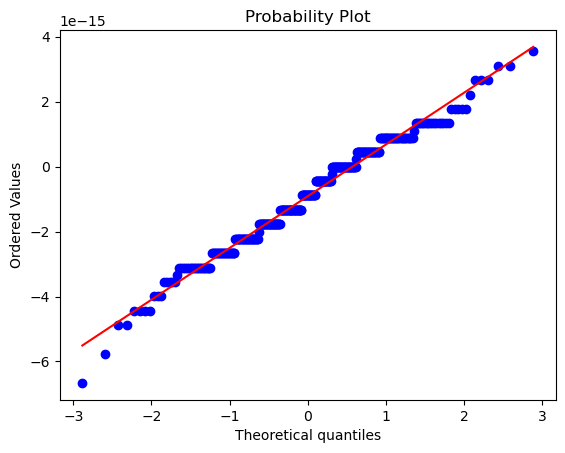

In [37]:
# Plot q-q plot of residuals
import pylab

import scipy.stats as stats

stats.probplot(residuals, dist = "norm", plot = pylab)

plt.show()

In [38]:
# RMSE
def rmse(predictions, targets):
    return np.sqrt(((targets - predictions) ** 2).mean())


# MAPE
def mape(predictions, targets):
    return np.mean(np.abs((targets - predictions)) / targets) * 100


# MAE
def mae(predictions, targets):
    return np.mean(np.abs((targets - predictions)))

## R2
from sklearn.metrics import r2_score


# Model Performance on test and train data
def model_pref(olsmodel, x_train, x_test):

    # In-sample Prediction
    y_pred_train = olsmodel.predict(x_train)
    y_observed_train = y_train

    # Prediction on test data
    y_pred_test = olsmodel.predict(x_test)
    y_observed_test = y_test

    print(
        pd.DataFrame(
            {
                "Data": ["Train", "Test"],
                "RMSE": [
                    rmse(y_pred_train, y_observed_train),
                    rmse(y_pred_test, y_observed_test),
                ],
                "MAE": [
                    mae(y_pred_train, y_observed_train),
                    mae(y_pred_test, y_observed_test),
                ],
                "MAPE": [
                    mape(y_pred_train, y_observed_train),
                    mape(y_pred_test, y_observed_test),
                ],
                "r2": [
                    r2_score(y_pred_train, y_observed_train),
                    r2_score(y_pred_test, y_observed_test),
                ],
            }
        )
    )


# Checking model performance
model_pref(model2, X_train, X_test)

    Data          RMSE           MAE          MAPE   r2
0  Train  1.837443e-15  1.455835e-15  4.876142e-14  1.0
1   Test  2.230358e-15  1.776357e-15  5.868701e-14  1.0


In [39]:
# Import the required function , Cross Validation

from sklearn.model_selection import cross_val_score

# Build the regression model and cross-validate
linearregression = LinearRegression()

cv_Score11 = cross_val_score(linearregression, X_train, y_train, cv = 10)
cv_Score12 = cross_val_score(linearregression, X_train, y_train, cv = 10,
                             scoring = 'neg_mean_squared_error')


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std() * 2))
print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std() * 2))

RSquared: 1.000 (+/- 0.000)
Mean Squared Error: 0.000 (+/- 0.000)


In [40]:
coef = model2.params

pd.DataFrame({'Feature' : coef.index, 'Coefs' : coef.values})

,Feature,Coefs
0,const,-1.609823e-15
1,Unnamed: 0,1.311885e-17
2,crim,-4.163336e-17
3,chas,-1.165734e-15
4,nox,6.106227e-16
5,rm,-2.775558e-17
6,dis,-1.526557e-16
7,rad,-9.020562e-17
8,tax,-3.686287e-18
9,ptratio,2.220446e-16


In [41]:
# Let us write the equation of the fit

Equation = "log (Price) = "

print(Equation, end = '\t')

for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

log (Price) = 	( -1.609823385706477e-15 ) *  const + ( 1.3118846287074604e-17 ) *  Unnamed: 0 + ( -4.163336342344337e-17 ) *  crim + ( -1.1657341758564144e-15 ) *  chas + ( 6.106226635438361e-16 ) *  nox + ( -2.7755575615628914e-17 ) *  rm + ( -1.5265566588595902e-16 ) *  dis + ( -9.020562075079397e-17 ) *  rad + ( -3.686287386450715e-18 ) *  tax + ( 2.220446049250313e-16 ) *  ptratio + ( -7.15573433840433e-18 ) *  black + ( -3.469446951953614e-17 ) *  lstat + ( 6.938893903907228e-17 ) *  medv + ( 0.9999999999999999 ) *  MEDV_log + 